In [1]:
!cp /content/drive/MyDrive/frames1.zip /content/

In [2]:
!unzip frames1.zip
!ls frames

Archive:  frames1.zip
   creating: frames/
  inflating: frames/0001.png         
  inflating: frames/0002.png         
  inflating: frames/0003.png         
  inflating: frames/0004.png         
  inflating: frames/0005.png         
  inflating: frames/0006.png         
  inflating: frames/0007.png         
  inflating: frames/0008.png         
  inflating: frames/0009.png         
  inflating: frames/0010.png         
  inflating: frames/0011.png         
  inflating: frames/0012.png         
  inflating: frames/0013.png         
  inflating: frames/0014.png         
  inflating: frames/0015.png         
  inflating: frames/0016.png         
  inflating: frames/0017.png         
  inflating: frames/0018.png         
  inflating: frames/0019.png         
  inflating: frames/0020.png         
  inflating: frames/0021.png         
  inflating: frames/0022.png         
  inflating: frames/0023.png         
  inflating: frames/0024.png         
  inflating: frames/0025.png         
  infla

In [3]:
!pip install diffusers transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [4]:
!pip install opencv-contrib-python
!pip install controlnet aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of controlnet to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement cudatoolkit~=11.3 (from controlnet) (from versions: none)
ERROR: No matching distribution found for cudatoolkit~=11.3


In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
ControlNet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [8]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "dreamlike-art/dreamlike-diffusion-1.0", controlnet=ControlNet, torch_dtype=torch.float16
).to(device)

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
from diffusers.utils import load_image
from PIL import Image
import numpy as np

In [10]:
image = load_image("frames/0001.png")
image = np.array(image)

In [11]:
image.shape

(1280, 720, 3)

In [12]:
low_threshold = 100
high_threshold = 255
canny_input = cv2.Canny(image, low_threshold, high_threshold)
canny_input = canny_input[:, :, None] # Adds channel dimension after H and W
canny_input = np.repeat(canny_input, 3, axis=2) # concatenates 3 arays on channel dimension
canny_input.shape

(1280, 720, 3)

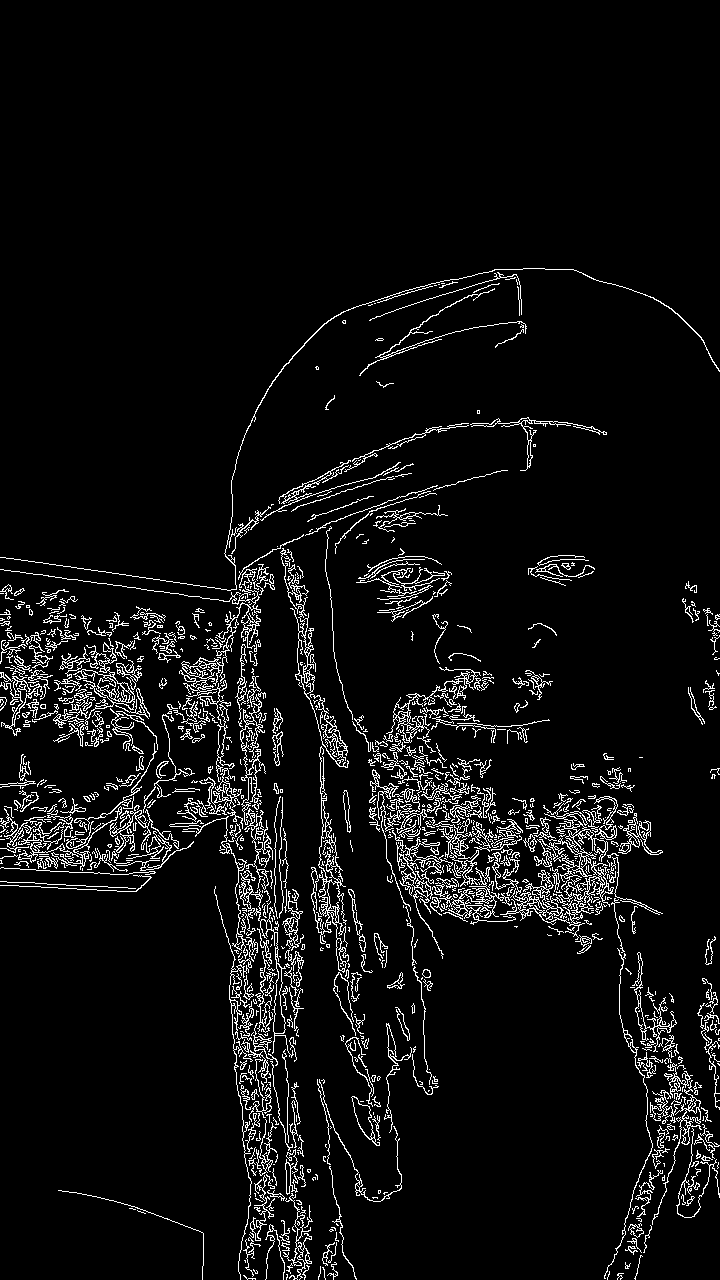

In [13]:
canny_input = Image.fromarray(canny_input)
canny_input

In [14]:
from diffusers import DDIMScheduler

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

In [23]:
prompt = ["masterpiece, man, cg style"]
output = pipe(
    prompt,
    canny_input,
    negative_prompt=[""],
    num_inference_steps=20,
    guidance_scale = 5,
    controlnet_conditioning_scale=0.7
)

  0%|          | 0/20 [00:00<?, ?it/s]

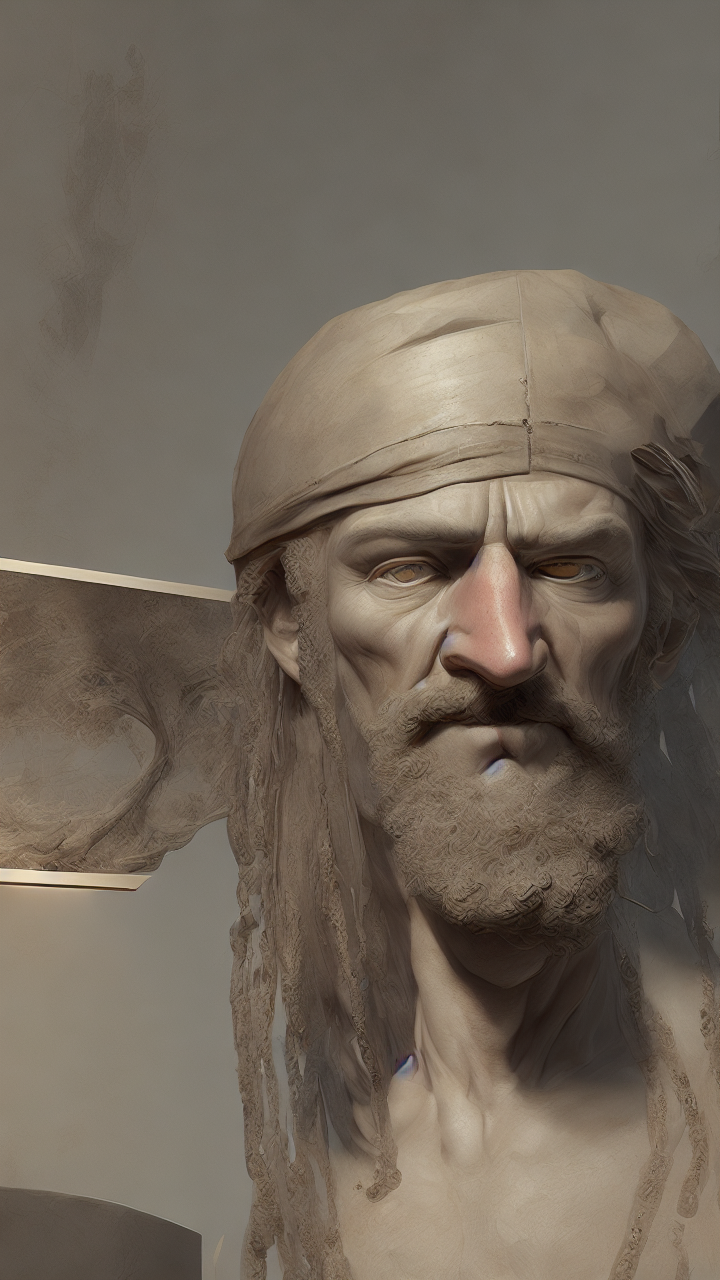

In [24]:
output[0][0]